# Exp rolling ball: 
TODO: Plotting, fitting...

In [264]:
!pip install pandas

### Data

In [1]:
# Exp 2ml: G actin
# Values checked

import pandas as pd

time1_min = [5, 10, 15, 20, 30, 40, 50, 60, 70]
t1_B_s = [7.35, 42.38, 23.28, 23.27, 30.57, 28.85, 25.49, 29.1, 31.0]
winkel1_deg = [30, 30, 45, 45, 60, 75, 75, 75, 75]
strecke1_cm = [7, 1, 1, 1, 1.6, 1, 1, 1, 1]


time2_min = [5, 10, 15, 20, 35, 40, 50, 60, 70]
t2_B_s = [2.6, 13, 40.7, 23.0, 150, 52, 83, 29.45, 61]
winkel2_deg = [30, 30, 45, 45, 60, 75, 75, 75, 75]
strecke2_cm = [7, 1, 1, 1, 1, 1, 1, 1, 1]

time_error_min = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5] # 30s Fehler
t_B_error_s = []


In [2]:
import pandas as pd
import numpy as np

df_raw = pd.DataFrame({
    "time1_min": time1_min,
    "time2_min": time2_min,
    "t1_B": t1_B_s,
    "t2_B": t2_B_s,
    "winkel_deg": winkel1_deg, # Gleicher winkel
    "strecke_cm": strecke1_cm, # Gleiche Strecke
})

# -------------------------
# Mittelwerte berechnen
# -------------------------

df_raw["mean_time_min"] = df_raw[["time1_min", "time2_min"]].mean(axis=1)
df_raw["mean_t_B"] = df_raw[["t1_B", "t2_B"]].mean(axis=1)

# -------------------------
# Ausgabe
# -------------------------

print(df_raw)


   time1_min  time2_min   t1_B    t2_B  winkel_deg  strecke_cm  mean_time_min  \
0          5          5   7.35    2.60          30         7.0            5.0   
1         10         10  42.38   13.00          30         1.0           10.0   
2         15         15  23.28   40.70          45         1.0           15.0   
3         20         20  23.27   23.00          45         1.0           20.0   
4         30         35  30.57  150.00          60         1.6           32.5   
5         40         40  28.85   52.00          75         1.0           40.0   
6         50         50  25.49   83.00          75         1.0           50.0   
7         60         60  29.10   29.45          75         1.0           60.0   
8         70         70  31.00   61.00          75         1.0           70.0   

   mean_t_B  
0     4.975  
1    27.690  
2    31.990  
3    23.135  
4    90.285  
5    40.425  
6    54.245  
7    29.275  
8    46.000  


In [3]:
# Fehlerberechnung
df_raw["time_error_min"] = time_error_min

# SEM Funktion für t_B
def sem_two(a, b):
    return np.abs(a - b) / np.sqrt(2)

# t_B Fehler
df_raw["t_B_error_s"] = df_raw.apply(lambda row: sem_two(row["t1_B"], row["t2_B"]), axis=1)

# Ausgabe
print(df_raw)


   time1_min  time2_min   t1_B    t2_B  winkel_deg  strecke_cm  mean_time_min  \
0          5          5   7.35    2.60          30         7.0            5.0   
1         10         10  42.38   13.00          30         1.0           10.0   
2         15         15  23.28   40.70          45         1.0           15.0   
3         20         20  23.27   23.00          45         1.0           20.0   
4         30         35  30.57  150.00          60         1.6           32.5   
5         40         40  28.85   52.00          75         1.0           40.0   
6         50         50  25.49   83.00          75         1.0           50.0   
7         60         60  29.10   29.45          75         1.0           60.0   
8         70         70  31.00   61.00          75         1.0           70.0   

   mean_t_B  time_error_min  t_B_error_s  
0     4.975             0.5     3.358757  
1    27.690             0.5    20.774797  
2    31.990             0.5    12.317800  
3    23.135      

In [4]:
# Without outliers 35min 150s -> rm
# Exp 2ml: G actin
# Values checked

import pandas as pd

time1_min = [5, 10, 15, 20, 30, 40, 50, 60, 70]
t1_B_s = [7.35, 13, 23.28, 23.27, 30.57, 28.85, 25.49, 29.1, 31.0]
t1_B_error_s = []
winkel1_deg = [30, 30, 45, 45, 60, 75, 75, 75, 75]
strecke1_cm = [7, 1, 1, 1, 1.6, 1, 1, 1, 1]


time2_min = [5, 10, 15, 20, 30, 40, 50, 60, 70]
t2_B_s = [2.6, 13, 23.28, 23.0, 30.57, 52, 83, 29.45, 61]
t2_B_error_s = []
winkel2_deg = [30, 30, 45, 45, 60, 75, 75, 75, 75]
strecke2_cm = [7, 1, 1, 1, 1, 1, 1, 1, 1]

import pandas as pd
import numpy as np



df_raw_rm_outlier = pd.DataFrame({
    "time1_min": time1_min,
    "time2_min": time2_min,
    "t1_B": t1_B_s,
    "t2_B": t2_B_s,
    "winkel_deg": winkel1_deg, # Gleicher winkel
    "strecke_cm": strecke1_cm, # Gleiche Strecke
})

# -------------------------
# Mittelwerte berechnen
# -------------------------

df_raw_rm_outlier["mean_time_min"] = df_raw_rm_outlier[["time1_min", "time2_min"]].mean(axis=1)
df_raw_rm_outlier["mean_t_B"] = df_raw_rm_outlier[["t1_B", "t2_B"]].mean(axis=1)

# -------------------------
# Ausgabe
# -------------------------

print(df_raw_rm_outlier)

   time1_min  time2_min   t1_B   t2_B  winkel_deg  strecke_cm  mean_time_min  \
0          5          5   7.35   2.60          30         7.0            5.0   
1         10         10  13.00  13.00          30         1.0           10.0   
2         15         15  23.28  23.28          45         1.0           15.0   
3         20         20  23.27  23.00          45         1.0           20.0   
4         30         30  30.57  30.57          60         1.6           30.0   
5         40         40  28.85  52.00          75         1.0           40.0   
6         50         50  25.49  83.00          75         1.0           50.0   
7         60         60  29.10  29.45          75         1.0           60.0   
8         70         70  31.00  61.00          75         1.0           70.0   

   mean_t_B  
0     4.975  
1    13.000  
2    23.280  
3    23.135  
4    30.570  
5    40.425  
6    54.245  
7    29.275  
8    46.000  


In [5]:
# Fehlerberechnung
# Ausreißer Fehler stark vergrößert auf 30% des Mittelwerts des Outlier nur Messwert 1 berücksichtigt

df_raw_rm_outlier["time_error_min"] = time_error_min

# SEM Funktion für t_B
def sem_two(a, b):
    sem = np.abs(a - b) / np.sqrt(2)
    if sem == 0:
        min_error = 0.30 * (a + b)/2 
        return min_error
    return sem

# t_B Fehler
df_raw_rm_outlier["t_B_error_s"] = df_raw_rm_outlier.apply(lambda row: sem_two(row["t1_B"], row["t2_B"]), axis=1)

# Ausgabe
print(df_raw_rm_outlier)

   time1_min  time2_min   t1_B   t2_B  winkel_deg  strecke_cm  mean_time_min  \
0          5          5   7.35   2.60          30         7.0            5.0   
1         10         10  13.00  13.00          30         1.0           10.0   
2         15         15  23.28  23.28          45         1.0           15.0   
3         20         20  23.27  23.00          45         1.0           20.0   
4         30         30  30.57  30.57          60         1.6           30.0   
5         40         40  28.85  52.00          75         1.0           40.0   
6         50         50  25.49  83.00          75         1.0           50.0   
7         60         60  29.10  29.45          75         1.0           60.0   
8         70         70  31.00  61.00          75         1.0           70.0   

   mean_t_B  time_error_min  t_B_error_s  
0     4.975             0.5     3.358757  
1    13.000             0.5     3.900000  
2    23.280             0.5     6.984000  
3    23.135             0.5

### Velocity

In [6]:
def velocity_calc_mm_per_s(distance: float, time: float):
    velocity = distance*10/time 
    return velocity

In [7]:
def velocity_calc_error_mm_per_s(distance: float, t: float, t_error: float):
    velocity_error_mm_per_s = (distance * 10)/(t ** 2) * t_error
    return velocity_error_mm_per_s

In [8]:
# Velocity berechnen aus den Mittelwerten
df_raw["velocity_mm_per_s"] = df_raw.apply(
    lambda row: velocity_calc_mm_per_s(row["strecke_cm"], row["mean_t_B"]),
    axis=1
)

# Velocity-Fehler berechnen
df_raw["velocity_error_mm_per_s"] = df_raw.apply(
    lambda row: velocity_calc_error_mm_per_s(row["strecke_cm"], row["mean_t_B"], row["t_B_error_s"]),
    axis=1
)

print(df_raw[[
    "strecke_cm", "mean_t_B", "t_B_error_s",
    "velocity_mm_per_s", "velocity_error_mm_per_s"
]])


   strecke_cm  mean_t_B  t_B_error_s  velocity_mm_per_s  \
0         7.0     4.975     3.358757          14.070352   
1         1.0    27.690    20.774797           0.361141   
2         1.0    31.990    12.317800           0.312598   
3         1.0    23.135     0.190919           0.432246   
4         1.6    90.285    84.449763           0.177217   
5         1.0    40.425    16.369522           0.247372   
6         1.0    54.245    40.665711           0.184349   
7         1.0    29.275     0.247487           0.341588   
8         1.0    46.000    21.213203           0.217391   

   velocity_error_mm_per_s  
0                 9.499275  
1                 0.270951  
2                 0.120366  
3                 0.003567  
4                 0.165763  
5                 0.100170  
6                 0.138200  
7                 0.002888  
8                 0.100251  


In [9]:
# Velocity without outlier
df_raw_rm_outlier["velocity_mm_per_s"] = df_raw_rm_outlier.apply(
    lambda row: velocity_calc_mm_per_s(row["strecke_cm"], row["mean_t_B"]),
    axis=1
)

# Velocity-Fehler berechnen
df_raw_rm_outlier["velocity_error_mm_per_s"] = df_raw_rm_outlier.apply(
    lambda row: velocity_calc_error_mm_per_s(row["strecke_cm"], row["mean_t_B"], row["t_B_error_s"]),
    axis=1
)

print(df_raw_rm_outlier[[
    "strecke_cm", "mean_t_B", "t_B_error_s",
    "velocity_mm_per_s", "velocity_error_mm_per_s"
]])

   strecke_cm  mean_t_B  t_B_error_s  velocity_mm_per_s  \
0         7.0     4.975     3.358757          14.070352   
1         1.0    13.000     3.900000           0.769231   
2         1.0    23.280     6.984000           0.429553   
3         1.0    23.135     0.190919           0.432246   
4         1.6    30.570     9.171000           0.523389   
5         1.0    40.425    16.369522           0.247372   
6         1.0    54.245    40.665711           0.184349   
7         1.0    29.275     0.247487           0.341588   
8         1.0    46.000    21.213203           0.217391   

   velocity_error_mm_per_s  
0                 9.499275  
1                 0.230769  
2                 0.128866  
3                 0.003567  
4                 0.157017  
5                 0.100170  
6                 0.138200  
7                 0.002888  
8                 0.100251  


### Viscosity 

In [10]:
# Values
K = 0.000583           # Korrekturfaktor
d_kugel_mm = 0.6       # mm
d_kapillare_m = 0

g = 9.81               # m/s^2
roh_water = 1          # g/cm^3
roh_kugel = 7.85       # g/cm^3 (aus Skript)

In [11]:
# test sinus
import math 
print(math.sin(math.radians(30)))

0.49999999999999994


In [12]:
import math
# Durchmesser Kapillare
# Rechnung - Volumen = 100µl -> *10^-6 -> 100l -> *10^3 -> cm^3 
# Formel: V = π r^2 * h (G = Grundfläche Kreis und h = Höhe)
V = 100 # µl = 0.001 cm^3
V = V * 0.001 # cm^3
h = 9 # cm

r_kapillare_mm = math.sqrt(V/(np.pi * h))
print(f"Radius {r_kapillare_mm} cm")
        
d_kapillare_mm = r_kapillare_mm*2
print(f"Durchmesser {d_kapillare_mm} cm")


Radius 0.05947080387175904 cm
Durchmesser 0.11894160774351809 cm


In [13]:
# # Calc viscosity
# def viscosity_formula(K: float, roh_fluid: float, roh_shape: float, angle: float, d_tube: float, d_shape: float, g: float, velocity: float):
#     viscosity = (5*math.pi/42 * K * d_shape ** 2 * roh_fluid * g * math.sin(math.radians(angle)))/velocity * (roh_shape - roh_fluid)/roh_fluid * (d_tube + d_shape)/d_shape
#     return viscosity

In [14]:
import math

def viscosity_error_formula(K: float, roh_fluid: float, roh_shape: float,
                      angle: float, d_tube: float, d_shape: float,
                      g: float, velocity: float):
    
    numerator = (5 * math.pi / 42) * K * (d_shape ** 2) * roh_fluid * g * math.sin(math.radians(angle))
    correction = (roh_shape - roh_fluid) / roh_fluid * (d_tube + d_shape) / d_shape
    
    viscosity = numerator * correction / velocity
    return viscosity


In [15]:
# Fehlerrechnung
def viscosity_error_formula(K, roh_fluid, roh_shape, angle, d_tube, d_shape, g,
                            velocity, velocity_error):
    
    numerator = (5 * math.pi / 42) * K * (d_shape ** 2) * roh_fluid * g * math.sin(math.radians(angle))
    correction = (roh_shape - roh_fluid) / roh_fluid * (d_tube + d_shape) / d_shape
    
    C = numerator * correction  # alles außer 1/v
    
    d_eta = C / (velocity ** 2) * velocity_error
    return d_eta


In [16]:
# Viscosity error
df_raw["viscosity_mPa_s"] = df_raw.apply(
    lambda row: viscosity_formula(
        K, roh_water, roh_kugel,
        row["winkel_deg"],
        d_kapillare_mm, d_kugel_mm,
        g,
        row["velocity_mm_per_s"]
    ),
    axis=1
)
print(df_raw["viscosity_mPa_s"])

NameError: name 'viscosity_formula' is not defined

In [ ]:
# Viscosity error
df_raw["viscosity_error_mPa_s"] = df_raw.apply(
    lambda row: viscosity_error_formula(
        K, roh_water, roh_kugel,
        row["winkel_deg"],
        d_kapillare_mm, d_kugel_mm,
        g,
        row["velocity_mm_per_s"],
        row["velocity_error_mm_per_s"]
    ),
    axis=1
)
print(df_raw["viscosity_error_mPa_s"])

0    0.000152
1    0.006565
2    0.005505
3    0.000085
4    0.028890
5    0.009994
6    0.024827
7    0.000151
8    0.012951
Name: viscosity_error_mPa_s, dtype: float64


In [ ]:
# Viscosity error without outlier
df_raw_rm_outlier["viscosity_mPa_s"] = df_raw_rm_outlier.apply(
    lambda row: viscosity_formula(
        K, roh_water, roh_kugel,
        row["winkel_deg"],
        d_kapillare_mm, d_kugel_mm,
        g,
        row["velocity_mm_per_s"]
    ),
    axis=1
)
print(df_raw_rm_outlier["viscosity_mPa_s"])

0    0.000225
1    0.004108
2    0.010404
3    0.010339
4    0.010458
5    0.024680
6    0.033117
7    0.017872
8    0.028083
Name: viscosity_mPa_s, dtype: float64


In [ ]:
# Viscosity error without outlier
df_raw_rm_outlier["viscosity_error_mPa_s"] = df_raw_rm_outlier.apply(
    lambda row: viscosity_error_formula(
        K, roh_water, roh_kugel,
        row["winkel_deg"],
        d_kapillare_mm, d_kugel_mm,
        g,
        row["velocity_mm_per_s"],
        row["velocity_error_mm_per_s"]
    ),
    axis=1
)
print(df_raw_rm_outlier["viscosity_error_mPa_s"])

0    0.000152
1    0.001232
2    0.003121
3    0.000085
4    0.003137
5    0.009994
6    0.024827
7    0.000151
8    0.012951
Name: viscosity_error_mPa_s, dtype: float64


In [ ]:
print(df_raw)

   time1_min  time2_min   t1_B    t2_B  winkel_deg  strecke_cm  mean_time_min  \
0          5          5   7.35    2.60          30         7.0            5.0   
1         10         10  42.38   13.00          30         1.0           10.0   
2         15         15  23.28   40.70          45         1.0           15.0   
3         20         20  23.27   23.00          45         1.0           20.0   
4         30         35  30.57  150.00          60         1.6           32.5   
5         40         40  28.85   52.00          75         1.0           40.0   
6         50         50  25.49   83.00          75         1.0           50.0   
7         60         60  29.10   29.45          75         1.0           60.0   
8         70         70  31.00   61.00          75         1.0           70.0   

   mean_t_B  time_error_min  t_B_error_s  velocity_mm_per_s  \
0     4.975             0.5     3.358757          14.070352   
1    27.690             0.5    20.774797           0.361141   


In [ ]:
print(df_raw_rm_outlier)

   time1_min  time2_min   t1_B   t2_B  winkel_deg  strecke_cm  mean_time_min  \
0          5          5   7.35   2.60          30         7.0            5.0   
1         10         10  13.00  13.00          30         1.0           10.0   
2         15         15  23.28  23.28          45         1.0           15.0   
3         20         20  23.27  23.00          45         1.0           20.0   
4         30         30  30.57  30.57          60         1.6           30.0   
5         40         40  28.85  52.00          75         1.0           40.0   
6         50         50  25.49  83.00          75         1.0           50.0   
7         60         60  29.10  29.45          75         1.0           60.0   
8         70         70  31.00  61.00          75         1.0           70.0   

   mean_t_B  time_error_min  t_B_error_s  velocity_mm_per_s  \
0     4.975             0.5     3.358757          14.070352   
1    13.000             0.5     3.900000           0.769231   
2    23.28

# Plotting
velocity time?
visosity time?
velocity viscosity?
critical conc.
...

In [ ]:
# Velocity

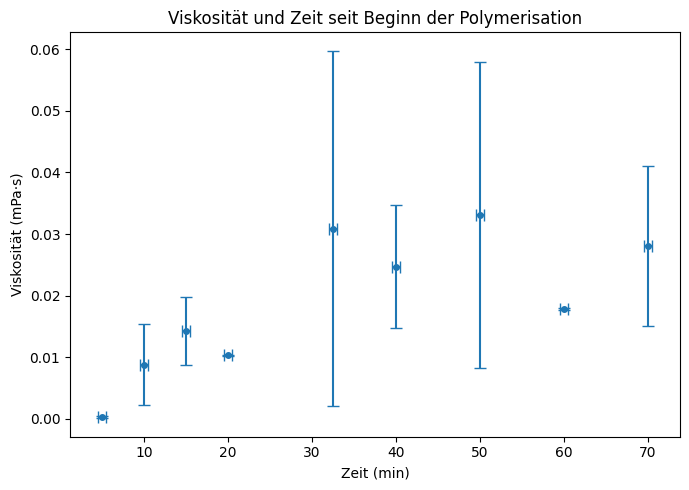

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

plt.errorbar(
    df_raw["mean_time_min"],
    df_raw["viscosity_mPa_s"],
    xerr=df_raw["time_error_min"],
    yerr=df_raw["viscosity_error_mPa_s"],
    fmt='o',
    markersize=4,      # kleinerer Marker
    capsize=4
)

plt.xlabel("Zeit (min)")
plt.ylabel("Viskosität (mPa·s)")
plt.title("Viskosität und Zeit seit Beginn der Polymerisation")

plt.tight_layout()
plt.show()



In [ ]:
# 

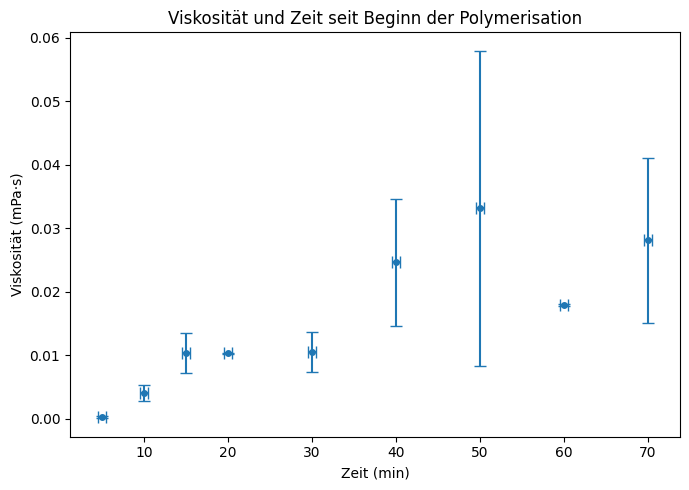

In [ ]:
# Viscosity without outlier
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

plt.errorbar(
    df_raw_rm_outlier["mean_time_min"],
    df_raw_rm_outlier["viscosity_mPa_s"],
    xerr=df_raw_rm_outlier["time_error_min"],
    yerr=df_raw_rm_outlier["viscosity_error_mPa_s"],
    fmt='o',
    markersize=4,      # kleinerer Marker
    capsize=4
)

plt.xlabel("Zeit (min)")
plt.ylabel("Viskosität (mPa·s)")
plt.title("Viskosität und Zeit seit Beginn der Polymerisation")

plt.tight_layout()
plt.show()

# Fitting

---- Sigmoid-Fit ----
A  = -17.03154200200601
B  = 0.01896110324621749
k  = 0.051797660137421916
t0 = -126.52052457081294


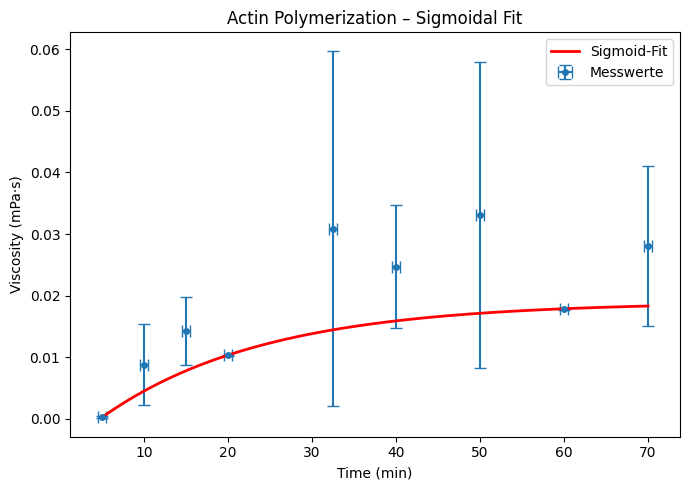


---- Fit-Qualität ----
R²   = 0.5305
RMSE = 0.008964 mPa·s
Reduced Chi² = 0.7788


In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sigmoid-Funktion
def sigmoid(t, A, B, k, t0):
    return A + (B - A) / (1 + np.exp(-k * (t - t0)))

# Daten
x = df_raw["mean_time_min"].values
y = df_raw["viscosity_mPa_s"].values
y_err = df_raw["viscosity_error_mPa_s"].values

# Startparameter (sehr wichtig!)
A0 = min(y)
B0 = max(y)
k0 = 0.1
t0_0 = np.median(x)

p0 = [A0, B0, k0, t0_0]

# Fit durchführen
params, cov = curve_fit(
    sigmoid,
    x,
    y,
    p0=p0,
    sigma=y_err,
    absolute_sigma=True,
    maxfev=20000
)

A_fit, B_fit, k_fit, t0_fit = params

print("---- Sigmoid-Fit ----")
print("A  =", A_fit)
print("B  =", B_fit)
print("k  =", k_fit)
print("t0 =", t0_fit)

# Fit-Kurve erstellen
t_fit = np.linspace(min(x), max(x), 500)
y_fit = sigmoid(t_fit, *params)

# Plot
plt.figure(figsize=(7,5))
plt.errorbar(
    x, y,
    xerr=df_raw["time_error_min"],
    yerr=y_err,
    fmt='o',
    markersize=4,
    capsize=4,
    label="Messwerte"
)

plt.plot(t_fit, y_fit, "r-", label="Sigmoid-Fit", linewidth=2)

plt.xlabel("Time (min)")
plt.ylabel("Viscosity (mPa·s)")
plt.title("Actin Polymerization – Sigmoidal Fit")
plt.legend()
plt.tight_layout()
plt.show()

# RMSE
RMSE = np.sqrt(np.mean((y - y_pred)**2))

print("\n---- Fit-Qualität ----")
print(f"R²   = {R2:.4f}")
print(f"RMSE = {RMSE:.6f} mPa·s")

# ---- Reduced Chi-Square berechnen ----

y_pred = sigmoid(x, *params)

# Chi-square
chi2 = np.sum(((y - y_pred) / y_err)**2)

# Degrees of freedom: N - p
N = len(y)
p = len(params)
chi2_red = chi2 / (N - p)

print(f"Reduced Chi² = {chi2_red:.4f}")



---- Sigmoid-Fit ----
A  = -21.20918545802181
B  = 0.018960964973688918
k  = 0.05177292080270359
t0 = -130.81785794734392


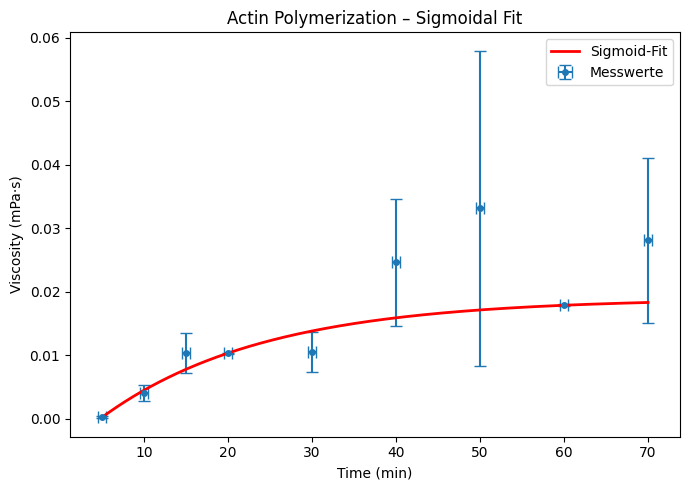

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sigmoid-Funktion
def sigmoid(t, A, B, k, t0):
    return A + (B - A) / (1 + np.exp(-k * (t - t0)))

# Daten
x = df_raw_rm_outlier["mean_time_min"].values
y = df_raw_rm_outlier["viscosity_mPa_s"].values
y_err = df_raw_rm_outlier["viscosity_error_mPa_s"].values

# Startparameter (sehr wichtig!)
A0 = min(y)
B0 = max(y)
k0 = 0.1
t0_0 = np.median(x)

p0 = [A0, B0, k0, t0_0]

# Fit durchführen
params, cov = curve_fit(
    sigmoid,
    x,
    y,
    p0=p0,
    sigma=y_err,
    absolute_sigma=True,
    maxfev=20000
)

A_fit, B_fit, k_fit, t0_fit = params

print("---- Sigmoid-Fit ----")
print("A  =", A_fit)
print("B  =", B_fit)
print("k  =", k_fit)
print("t0 =", t0_fit)

# Fit-Kurve erstellen
t_fit = np.linspace(min(x), max(x), 500)
y_fit = sigmoid(t_fit, *params)

# Plot
plt.figure(figsize=(7,5))
plt.errorbar(
    x, y,
    xerr=df_raw["time_error_min"],
    yerr=y_err,
    fmt='o',
    markersize=4,
    capsize=4,
    label="Messwerte"
)

plt.plot(t_fit, y_fit, "r-", label="Sigmoid-Fit", linewidth=2)

plt.xlabel("Time (min)")
plt.ylabel("Viscosity (mPa·s)")
plt.title("Actin Polymerization – Sigmoidal Fit")
plt.legend()
plt.tight_layout()
plt.show()


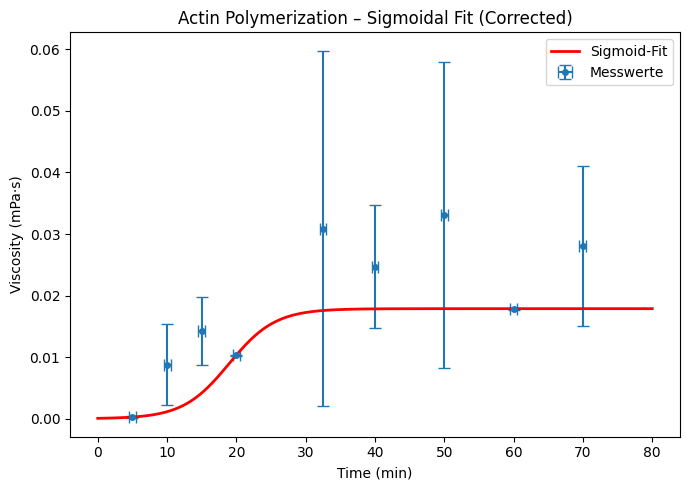

Fit-Parameter:
A = 8.72526334692591e-18
B = 0.01787543925721453
k = 0.3005580537834347
t0 = 18.94668399330539
R² = 0.2867


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def sigmoid(t, A, B, k, t0):
    return A + (B-A) / (1 + np.exp(-k*(t - t0)))

x = df_raw["mean_time_min"].values
y = df_raw["viscosity_mPa_s"].values
y_err = df_raw["viscosity_error_mPa_s"].values

# Bounded Fit: verhindert unrealistisch kleine Plateaus
lower_bounds = [0, 0.005, 0.0001, 0]       # A, B, k, t0
upper_bounds = [0.02, 0.10, 1.0, 100]      # A, B, k, t0

# Startwerte
p0 = [0.001, 0.04, 0.1, 30]

params, cov = curve_fit(
    sigmoid,
    x, y,
    p0=p0,
    bounds=(lower_bounds, upper_bounds),
    sigma=y_err,
    absolute_sigma=True,
    maxfev=20000
)

A_fit, B_fit, k_fit, t0_fit = params

# Fitkurve erzeugen (smooth)
t_fit = np.linspace(0, 80, 500)
y_fit = sigmoid(t_fit, *params)

# Plot
plt.figure(figsize=(7,5))

plt.errorbar(
    x, y,
    xerr=df_raw["time_error_min"],
    yerr=y_err,
    fmt='o',
    markersize=4,
    capsize=4,
    label="Messwerte"
)

plt.plot(t_fit, y_fit, "r-", label="Sigmoid-Fit", linewidth=2)

plt.xlabel("Time (min)")
plt.ylabel("Viscosity (mPa·s)")
plt.title("Actin Polymerization – Sigmoidal Fit (Corrected)")
plt.legend()
plt.tight_layout()
plt.show()

print("Fit-Parameter:")
print("A =", A_fit)
print("B =", B_fit)
print("k =", k_fit)
print("t0 =", t0_fit)

# R^2 berechnen
y_pred = sigmoid(x, *params)

SS_res = np.sum((y - y_pred)**2)
SS_tot = np.sum((y - np.mean(y))**2)

R2 = 1 - SS_res / SS_tot

print(f"R² = {R2:.4f}")



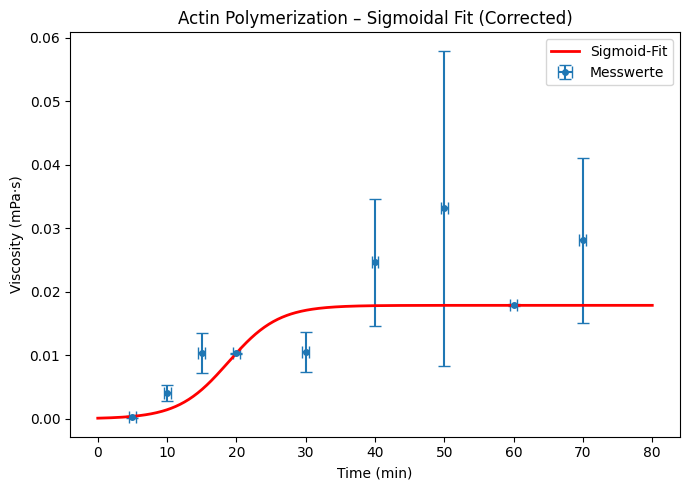

Fit-Parameter:
A = 6.623476749164421e-18
B = 0.017860954730230125
k = 0.2761661092770792
t0 = 18.845974964033932
R² = 0.5305
RMSE = 0.0072216167610952495
Reduced Chi² = 3.0411986522172256


In [ ]:
import numpy as np
from scipy.optimize import curve_fit

def sigmoid(t, A, B, k, t0):
    return A + (B-A) / (1 + np.exp(-k*(t - t0)))

x = df_raw_rm_outlier["mean_time_min"].values
y = df_raw_rm_outlier["viscosity_mPa_s"].values
y_err = df_raw_rm_outlier["viscosity_error_mPa_s"].values

# Bounded Fit: verhindert unrealistisch kleine Plateaus
lower_bounds = [0, 0.005, 0.0001, 0]       # A, B, k, t0
upper_bounds = [0.02, 0.10, 1.0, 100]      # A, B, k, t0

# Startwerte
p0 = [0.001, 0.04, 0.1, 30]

params, cov = curve_fit(
    sigmoid,
    x, y,
    p0=p0,
    bounds=(lower_bounds, upper_bounds),
    sigma=y_err,
    absolute_sigma=True,
    maxfev=20000
)

A_fit, B_fit, k_fit, t0_fit = params

# Fitkurve erzeugen (smooth)
t_fit = np.linspace(0, 80, 500)
y_fit = sigmoid(t_fit, *params)

# Plot
plt.figure(figsize=(7,5))

plt.errorbar(
    x, y,
    xerr=df_raw["time_error_min"],
    yerr=y_err,
    fmt='o',
    markersize=4,
    capsize=4,
    label="Messwerte"
)

plt.plot(t_fit, y_fit, "r-", label="Sigmoid-Fit", linewidth=2)

plt.xlabel("Time (min)")
plt.ylabel("Viscosity (mPa·s)")
plt.title("Actin Polymerization – Sigmoidal Fit (Corrected)")
plt.legend()
plt.tight_layout()
plt.show()

print("Fit-Parameter:")
print("A =", A_fit)
print("B =", B_fit)
print("k =", k_fit)
print("t0 =", t0_fit)

# R^2 berechnen
y_pred = sigmoid(x, *params)

SS_res = np.sum((y - y_pred)**2)
SS_tot = np.sum((y - np.mean(y))**2)

R2 = 1 - SS_res / SS_tot

print(f"R² = {R2:.4f}")

y_pred = sigmoid(x, *params)

# RMSE
RMSE = np.sqrt(np.mean((y - y_pred)**2))

# Reduced Chi-Square
chi2 = np.sum(((y - y_pred) / y_err)**2)
chi2_red = chi2 / (len(y) - len(params))

print("RMSE =", RMSE)
print("Reduced Chi² =", chi2_red)
